In [205]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1s6zeSJ93Hx6weTtnwYxiiahLvLB4Q5Ik"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Breast_Cancer_Dataset.csv')        # replace the file name with your file

In [206]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import random;
import numpy as np;

In [207]:
C = pd.read_csv('Breast_Cancer_Dataset.csv')
C

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

In [208]:
#Convert diagnosis to Benign and Malignant to codes
C['diagnosis']= C['diagnosis'].astype('category').cat.codes
C

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [209]:
#drop the id and the extraneous unnamed last column
C = C.drop(labels = ['id', 'Unnamed: 32'], axis = 1)
C

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [210]:
int(np.round(num_of_Rows*0.8))

455

In [212]:
#Create the training set
#Shuffle and copy first 80 percent rows as training set. Extract the dianosis column as the target (train_sety)
from sklearn.utils import shuffle
C = shuffle(C);
num_of_Rows = C.shape[0];
train_Set = C[:int(np.round(num_of_Rows*0.8))]
train_Sety = train_Set['diagnosis'];
train_Setx = train_Set.drop(columns = ['diagnosis'])

#copy last 80 percent rows as test set. Extract the dianosis column as the target (test_sety)
test_Set = C[int(np.round(num_of_Rows*0.8)):]
test_Sety = test_Set['diagnosis'];
test_Setx = test_Set.drop(columns = ['diagnosis'])

In [213]:
train_Setx

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
465,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.81,0.004929,0.06657,0.076830,0.013680,0.01526,0.008133,15.44,25.50,115.00,733.5,0.12010,0.5646,0.65560,0.13570,0.2845,0.12490
42,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.097230,0.026380,0.05333,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.7444,0.72420,0.24930,0.4670,0.10380
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,0.4357,1.0730,3.833,54.22,0.005524,0.03698,0.027060,0.012210,0.01415,0.003397,23.36,32.06,166.40,1688.0,0.13220,0.5601,0.38650,0.17080,0.3193,0.09221
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,0.4789,2.0600,3.479,46.61,0.003443,0.02661,0.030560,0.011100,0.01520,0.001519,18.22,28.07,120.30,1032.0,0.08774,0.1710,0.18820,0.08436,0.2527,0.05972
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.022540,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,0.3408,1.9240,2.287,28.93,0.005841,0.01246,0.007936,0.009128,0.01564,0.002985,15.05,41.61,96.69,705.6,0.11720,0.1421,0.07003,0.07763,0.2196,0.07675
80,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,0.07005,0.3251,2.1740,2.077,24.62,0.010370,0.01706,0.025860,0.007506,0.01816,0.003976,13.11,32.16,84.53,525.1,0.15570,0.1676,0.17550,0.06127,0.2762,0.08851
445,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,0.2623,1.2040,1.865,19.39,0.008320,0.02025,0.023340,0.016650,0.02094,0.003674,12.98,30.36,84.48,513.9,0.13110,0.1822,0.16090,0.12020,0.2599,0.08251
29,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,0.6003,0.8225,4.655,61.10,0.005627,0.03033,0.034070,0.013540,0.01925,0.003742,20.01,19.52,134.90,1227.0,0.12550,0.2812,0.24890,0.14560,0.2756,0.07919


In [214]:
train_Sety

465    0
42     1
198    1
157    0
6      1
      ..
455    0
80     0
445    0
29     1
76     0
Name: diagnosis, Length: 455, dtype: int8

In [215]:
C.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#Assignment 4.3 (1)
Fill in the blanks in following code

In [216]:
train_Setx = train_Setx.to_numpy()# is used to return a NumPy ndarray
test_Setx = test_Setx.to_numpy()  # is used to return a NumPy ndarray
train_Sety = train_Sety.to_numpy()# is used to return a NumPy ndarray
test_Sety = test_Sety.to_numpy()  # is used to return a NumPy ndarray

#random initialization of wirghts and normalization
k =0;
theta = [None] * (train_Setx.shape[1]+1);
theta[k] = random.uniform(-1,1);
M = np.mean(train_Setx,axis = 0)
S = np.std(train_Setx,axis = 0)

for i in range(0,train_Setx.shape[1]):
  theta[k+1] = random.uniform(-1,1);
  train_Setx[:,i] = np.divide((train_Setx[:,i]- M[k]),S[k])
  test_Setx[:,i] = np.divide((test_Setx[:,i]- M[k]),S[k])   
  k = k+1; 
theta[0] = random.uniform(-1,1);
train_Setx = np.append(np.ones([train_Setx.shape[0],1]), train_Setx, axis=1)
test_Setx = np.append(np.ones([test_Setx.shape[0],1]), test_Setx, axis=1)

In [217]:
train_Setx

array([[ 1.        , -0.24350806,  0.20442145, ...,  0.34393138,
        -0.06533759,  2.38683894],
       [ 1.        ,  1.41269741,  1.30911903, ...,  2.08594842,
         3.05454173,  1.1591423 ],
       [ 1.        ,  1.44394657,  0.76149117, ...,  0.88217784,
         0.52957638,  0.48478192],
       ...,
       [ 1.        , -0.59861215,  1.32800275, ...,  0.1062442 ,
        -0.48588023, -0.07960942],
       [ 1.        ,  0.9865725 , -0.99469473, ...,  0.49574449,
        -0.21748513, -0.27278254],
       [ 1.        , -0.16112392, -1.96484581, ..., -0.60114353,
        -0.29612318, -0.69636698]])

#Assignment 4.3 (1)
Fill in the blanks in the following code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


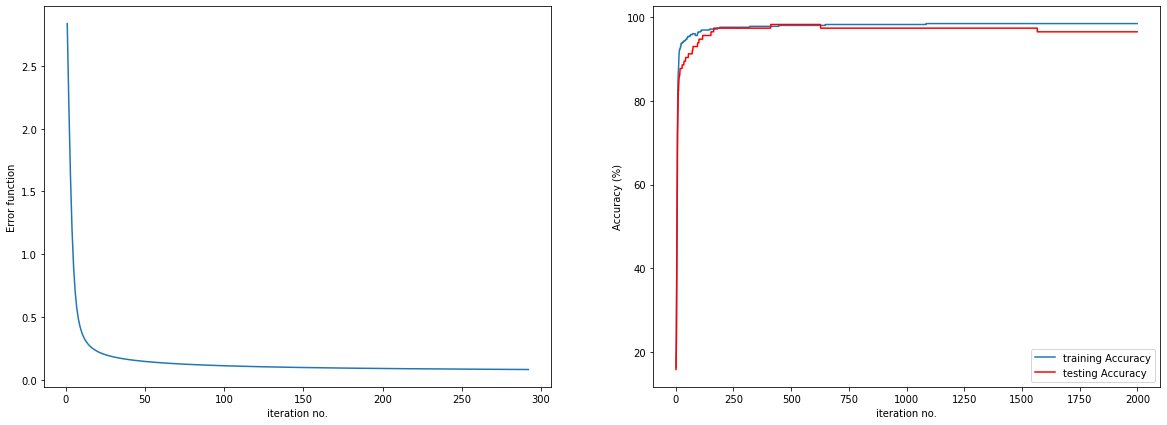

In [218]:
#Cost computation and weight updation
iteration_Nos = range(1, 2000)
training_Accuracy = [None] * len(iteration_Nos)
testing_Accuracy = [None] * len(iteration_Nos)
err_F = [None] * len(iteration_Nos)
m = train_Setx.shape[0];
alpha = 0.1;

for i in iteration_Nos:
    S_train =  np.divide(1, (1 + np.exp(-(train_Setx.dot(theta)))));
    S_test =  np.divide(1, (1 + np.exp(-(test_Setx.dot(theta)))));
    err_F[i-1] = -(1 / m) * np.sum((train_Sety * np.log(S_train)) + ((1 -train_Sety) * np.log(1 - S_train)) );
    theta = theta - (alpha/m) * ((S_train - train_Sety).dot(train_Setx));
    S_train[S_train >= 0.5]=1
    S_train[S_train<0.5] =0;
    S_test[S_test >= 0.5]=1
    S_test[S_test < 0.5] =0;
    training_Accuracy[i-1] = 100*np.count_nonzero(S_train == train_Sety)/train_Sety.shape[0];
    testing_Accuracy[i-1] = 100*np.count_nonzero(S_test == test_Sety)/test_Sety.shape[0];

plt.figure(figsize = [20,7])   
plt.subplot(1,2,1)
plt.plot(iteration_Nos, err_F)
plt.xlabel('iteration no.')
plt.ylabel('Error function')
ax = plt.subplot(1,2,2)
line1, =ax.plot(iteration_Nos, training_Accuracy)
line2, =ax.plot(iteration_Nos, testing_Accuracy, 'r')
plt.xlabel('iteration no.')
plt.ylabel('Accuracy (%)')
plt.legend((line1, line2), ('training Accuracy', 'testing Accuracy'))

In [219]:
print('Training Accuracy = ', training_Accuracy[-1], '% \nTesting Accuracy = ', testing_Accuracy[-1], '%')

Training Accuracy =  98.46153846153847 % 
Testing Accuracy =  96.49122807017544 %


**Logistic Regression Model Improvement Question**

In [220]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded1 = drive.CreateFile({'id':"1k7Ak2pgwKNMIApYW8Jsh0rglxPJne-ki"})
downloaded2 = drive.CreateFile({'id':"1cTfvmpw2Zc5UwjaptPz8ReJFkGsNdIDS"})   # replace the id with id of file you want to access
downloaded1.GetContentFile('two_Microchip_Tests.txt')        # replace the file name with your file
downloaded2.GetContentFile('two_Exam_Tests.txt')        # replace the file name with your file

In [222]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import random;
import numpy as np;

In [223]:
#Two different datasets are avaialble for testing in this notebook. You may activate any one of the following two lines to use one or the other data set. 
#C = pd.read_csv('two_Exam_Tests.txt', names = ['Exam1', 'Exam2', 'Result'])
C = pd.read_csv('two_Microchip_Tests.txt', names = ['Exam1', 'Exam2', 'Result'])
C

,Exam1,Exam2,Result
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


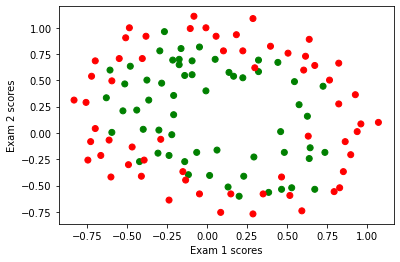

In [225]:
def plot_Exam_Data(normalize):
  Color_Arr = ['g']*C.shape[0];
  for i in range(0,C.shape[0]):
    if(C.Result[i] ==0): Color_Arr[i] ='r';
  if(normalize ==0):
    plt.scatter(C.Exam1, C.Exam2, c = Color_Arr)
  else:
    plt.scatter(X1, X2, c = Color_Arr)
  plt.xlabel('Exam 1 scores');
  plt.ylabel('Exam 2 scores');

plot_Exam_Data(0)

In [226]:
X1 = C.Exam1;
X1_Mean = np.mean(X1);
X1_Std = np.std(X1);
X1_N = (X1-np.mean(X1))/np.std(X1);
X2 = C.Exam2;
X2_Mean = np.mean(X2);
X2_Std = np.std(X2);
X2_N = (X2-np.mean(X2))/np.std(X2);
X3 = np.square(C.Exam1);
X3_Mean = np.mean(X3);
X3_Std = np.std(X3);
X3_N = (X3-np.mean(X3))/np.std(X3);
X4 = np.square(C.Exam2);
X4_Mean = np.mean(X4);
X4_Std = np.std(X4);
X4_N = (X4-np.mean(X4))/np.std(X4);

Y = C.Result

In [227]:
m = X1.shape[0];

a0 = random.uniform(-1,1);
a1 = random.uniform(-1,1);
a2 = random.uniform(-1,1);
a3 = random.uniform(-1,1);
a4 = random.uniform(-1,1);
learning_Rate = 1;

In [228]:
def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z;

In [229]:
def plot_Sigmoid_Surface(theta0,theta1, theta2, theta3, theta4, X1, X2):
  grid_X1 = np.arange(np.amin(X1), np.amax(X1),0.1);
  grid_X2 = np.arange(np.amin(X2), np.amax(X2),0.1);
  grid_X1_Sqr = np.square(grid_X1);
  grid_X2_Sqr = np.square(grid_X2);
  grid_X1_N =  (grid_X1 - X1_Mean)/X1_Std;
  grid_X2_N =  (grid_X2 - X2_Mean)/X2_Std;
  grid_X3_N =  (grid_X1_Sqr - X3_Mean)/X3_Std;
  grid_X4_N =  (grid_X2_Sqr - X4_Mean)/X4_Std;
  H = np.zeros([grid_X2.shape[0], grid_X1.shape[0]]);
  for i in range(0, grid_X2.shape[0]):
    for j in range(0,grid_X1.shape[0]):
      H[i,j] = sigmoid(theta0+theta1*grid_X1_N[j]+theta2*grid_X2_N[i]+ theta3*grid_X3_N[j]+theta4*grid_X4_N[i])
  plt.contour(grid_X1, grid_X2, H, levels = [0.5]);

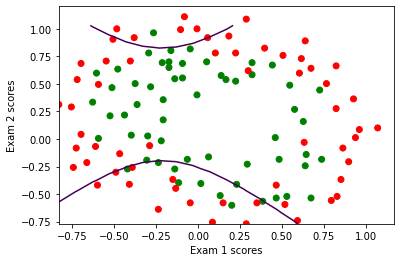

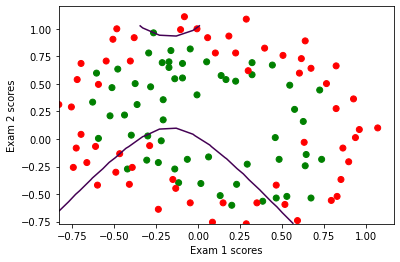

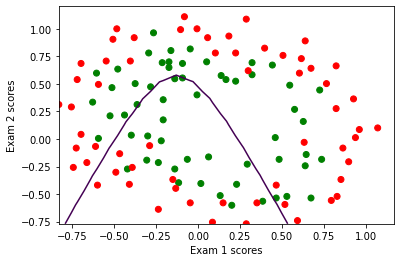

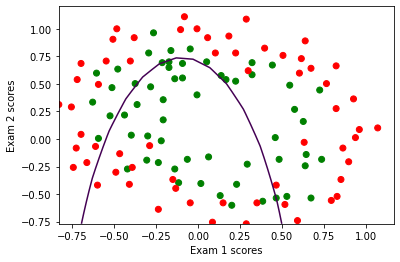

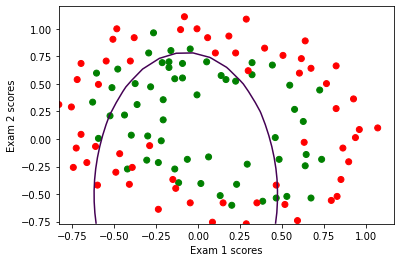

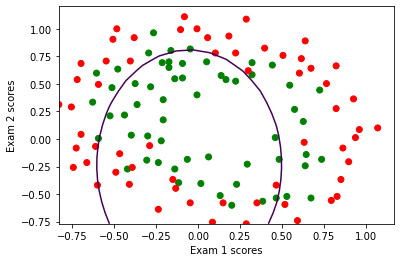

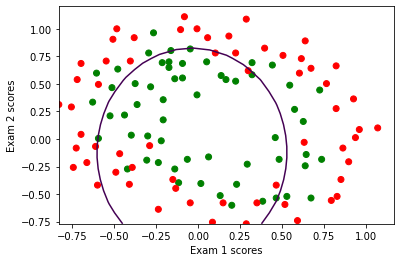

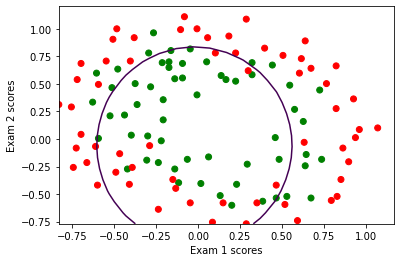

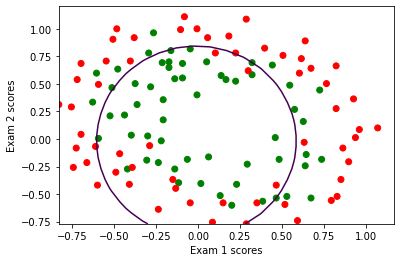

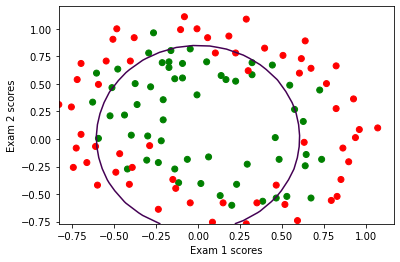

In [230]:
for i in range(0,10):
    h = sigmoid(a0+a1*X1_N+a2*X2_N+a3*X3_N+a4*X4_N);
    E = -(1/m)*np.sum(Y*np.log(h) + (1-Y)*(np.log(1-h)));
    a0 = a0 - (learning_Rate/m)*np.sum(h-Y);
    a1 = a1 - (learning_Rate/m)*np.sum((h-Y)*X1_N);
    a2 = a2 - (learning_Rate/m)*np.sum((h-Y)*X2_N);
    a3 = a3 - (learning_Rate/m)*np.sum((h-Y)*X3_N);
    a4 = a4 - (learning_Rate/m)*np.sum((h-Y)*X4_N);
    plt.figure()
    plot_Exam_Data(0)
    plot_Sigmoid_Surface(a0,a1, a2,a3, a4, X1, X2)

#Assignement 3 (1):

Increase the model complexity to fit the microchip dataset better.

In [231]:
#Normalization
X5 = np.power(C.Exam1, 3);
X5_Mean = np.mean(X5);
X5_Std = np.std(X5);
X5_N = (X5-np.mean(X5))/np.std(X5);
X6 = np.power(C.Exam2, 3);
X6_Mean = np.mean(X6);
X6_Std = np.std(X6);
X6_N = (X6-np.mean(X6))/np.std(X6);

In [232]:
#activation function
def plot_Sigmoid_Surface_new(theta0,theta1, theta2, theta3, theta4, theta5, theta6, X1, X2):
  grid_X1 = np.arange(np.amin(X1), np.amax(X1),0.1);
  grid_X2 = np.arange(np.amin(X2), np.amax(X2),0.1);
  grid_X1_Sqr = np.square(grid_X1);
  grid_X2_Sqr = np.square(grid_X2);
  grid_X1_cub = np.power(grid_X1,3);
  grid_X2_cub = np.power(grid_X2,3);  
  grid_X1_N =  (grid_X1 - X1_Mean)/X1_Std;
  grid_X2_N =  (grid_X1 - X2_Mean)/X2_Std;
  grid_X3_N =  (grid_X1_Sqr - X3_Mean)/X3_Std;
  grid_X4_N =  (grid_X2_Sqr - X4_Mean)/X4_Std;
  grid_X5_N =  (grid_X1_cub - X5_Mean)/X5_Std;
  grid_X6_N =  (grid_X2_cub - X6_Mean)/X6_Std;
  H = np.zeros([grid_X2.shape[0], grid_X1.shape[0]]);
  for i in range(0, grid_X2.shape[0]):
    for j in range(0,grid_X1.shape[0]):
      H[i,j] = sigmoid(theta0+theta1*grid_X1_N[j]+theta2*grid_X2_N[i]+ theta3*grid_X3_N[j]+theta4*grid_X4_N[i]+ theta5*grid_X5_N[j]+theta6*grid_X6_N[i])
  plt.contour(grid_X1, grid_X2, H, levels = [0.5]);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


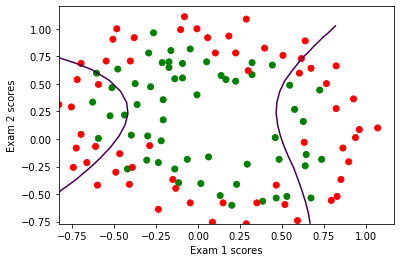

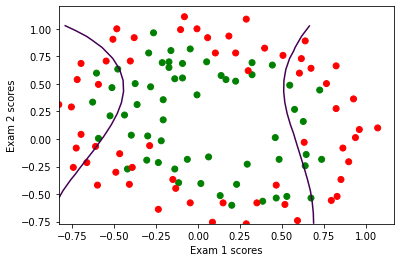

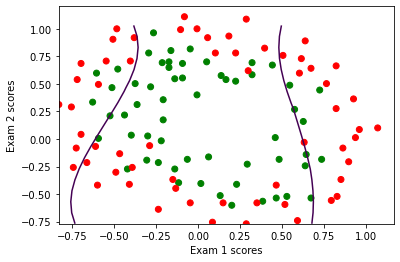

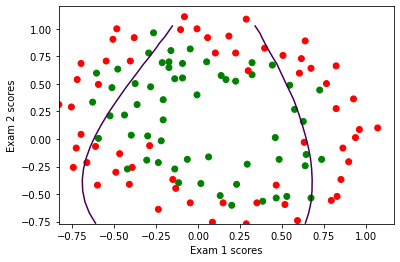

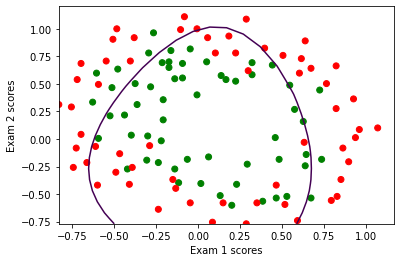

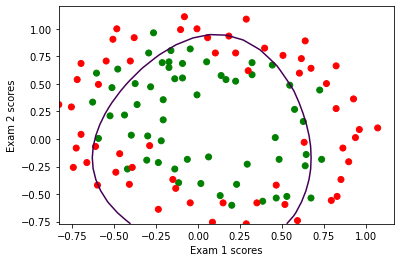

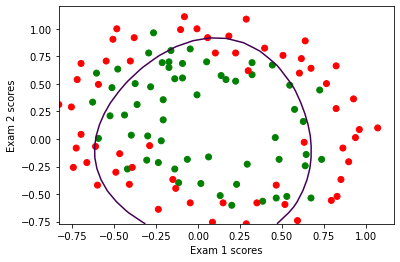

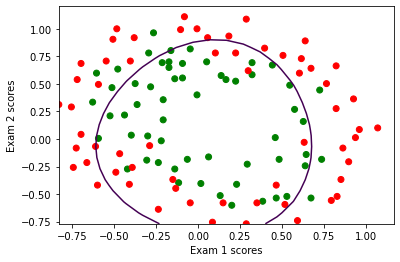

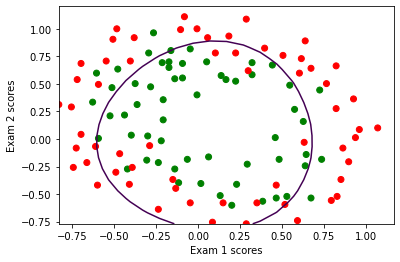

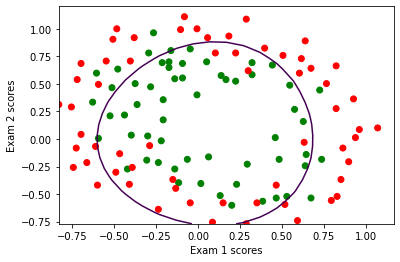

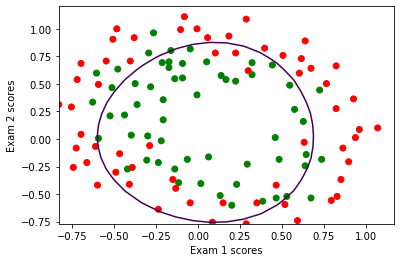

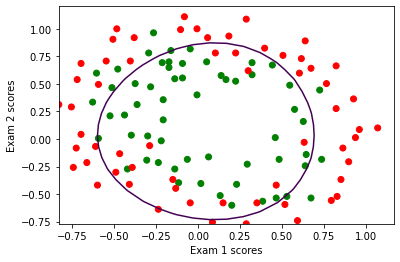

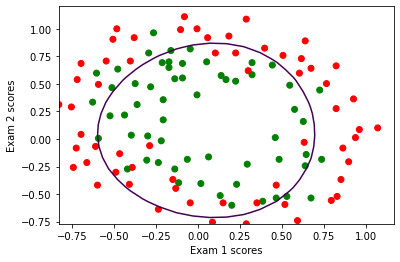

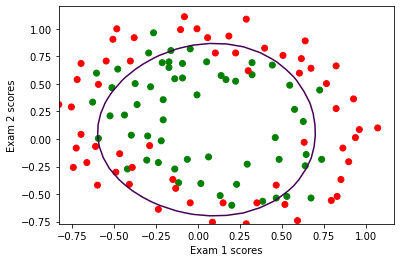

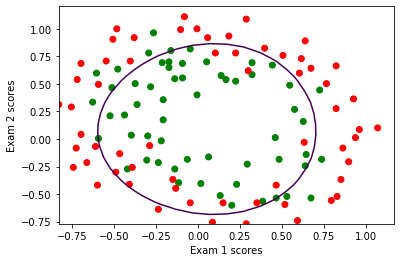

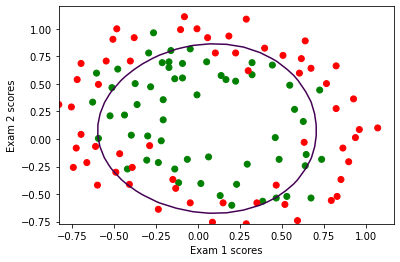

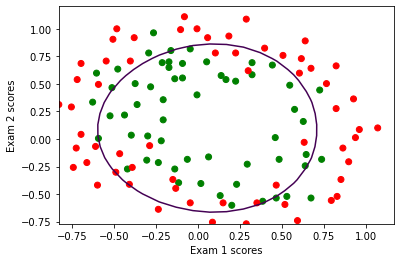

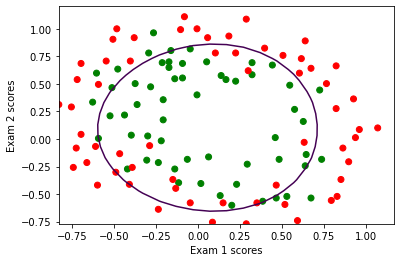

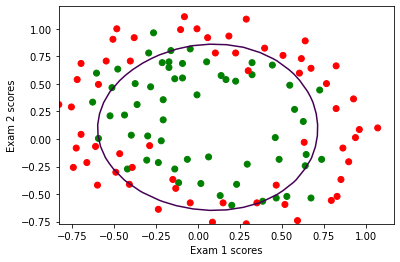

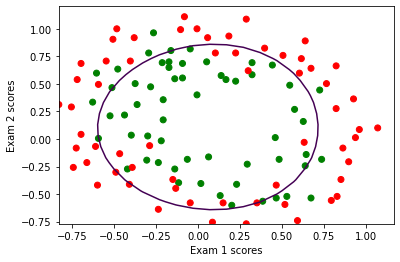

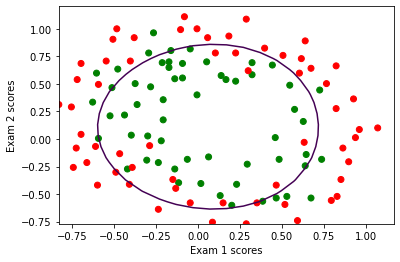

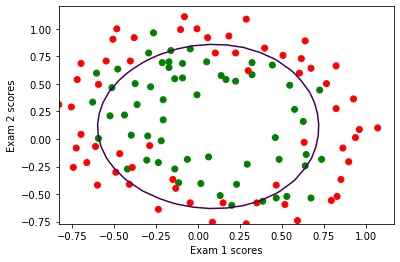

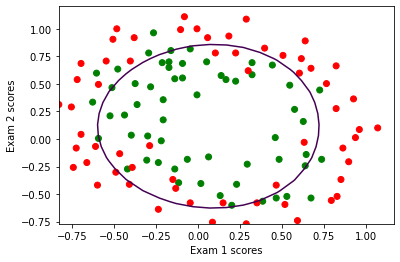

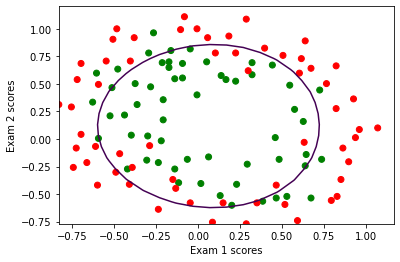

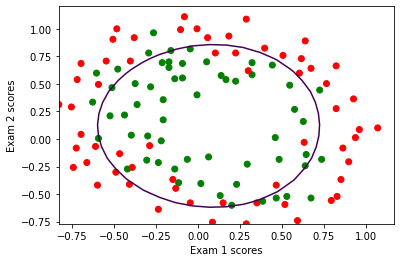

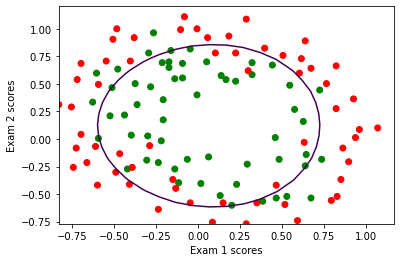

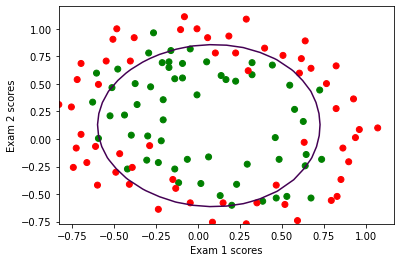

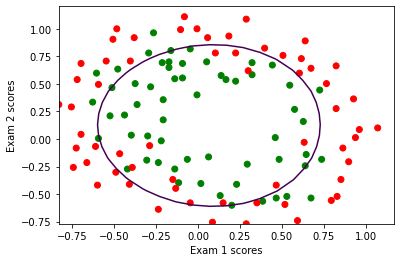

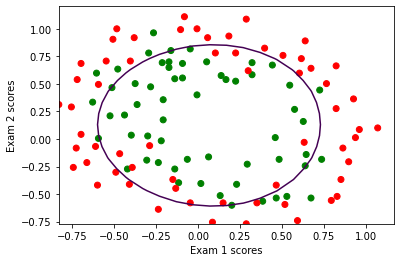

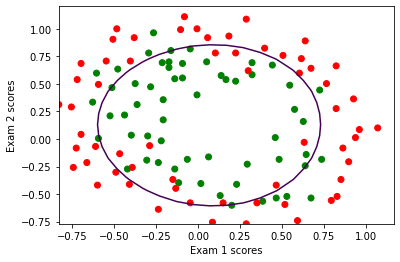

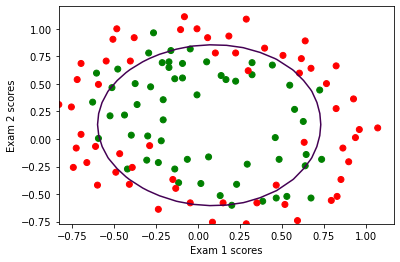

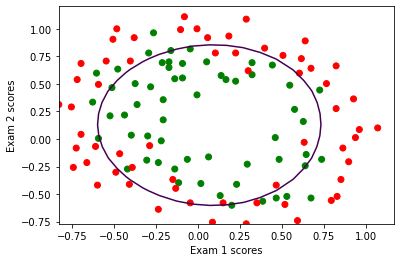

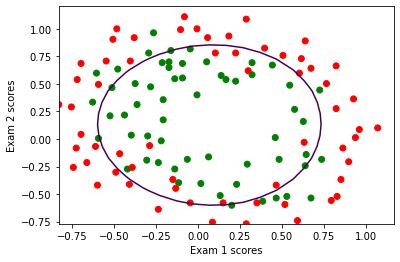

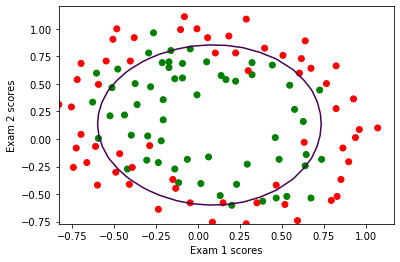

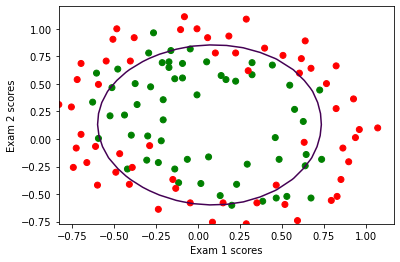

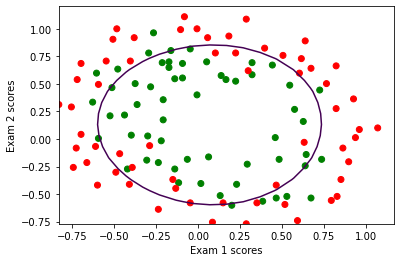

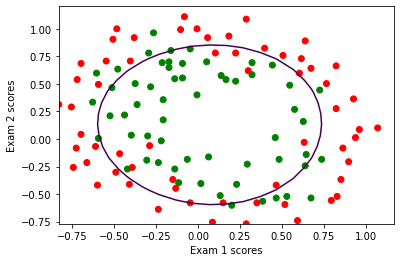

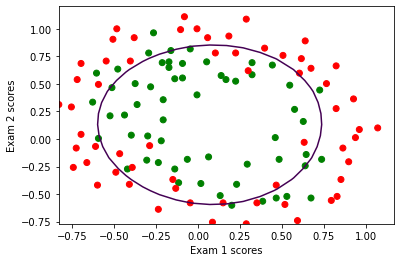

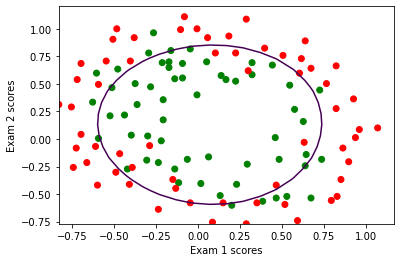

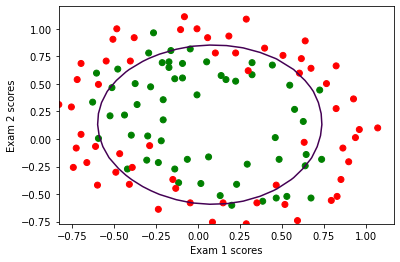

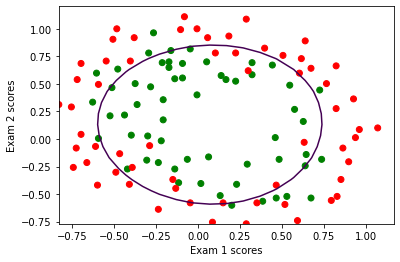

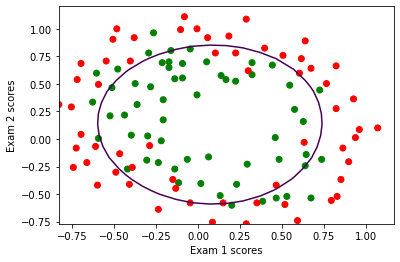

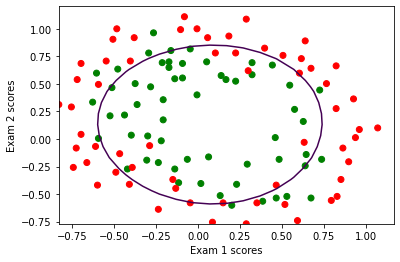

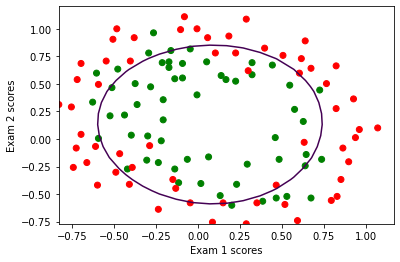

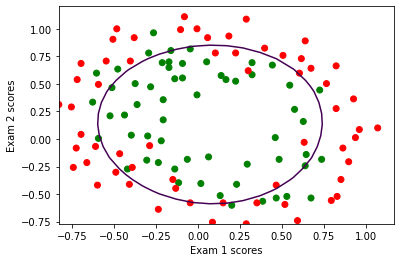

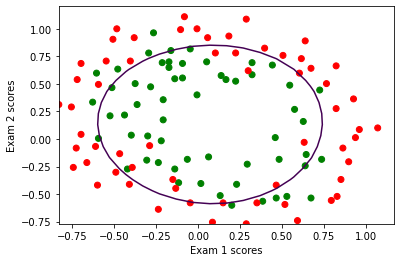

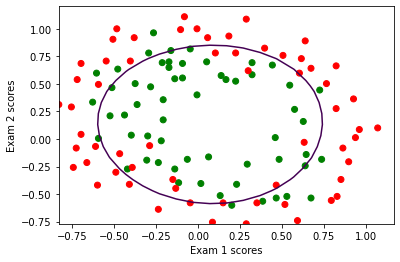

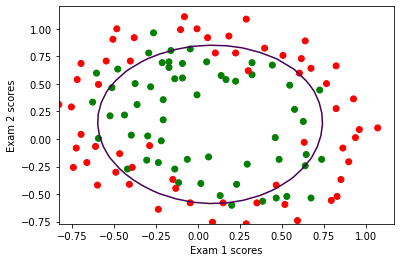

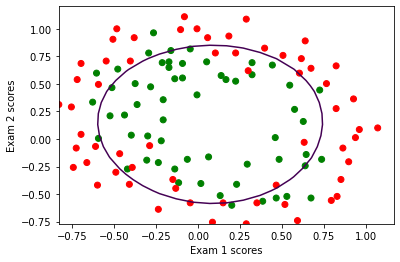

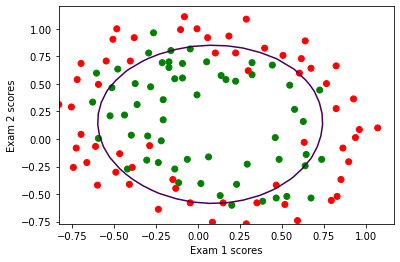

In [233]:
#Computing cost and weight updation 
a0 = random.uniform(-1,1);
a1 = random.uniform(-1,1);
a2 = random.uniform(-1,1);
a3 = random.uniform(-1,1);
a4 = random.uniform(-1,1);
a5 = random.uniform(-1,1);
a6 = random.uniform(-1,1);
learning_Rate = 1;

for i in range(0,50):
    h = sigmoid(a0+a1*X1_N+a2*X2_N+a3*X3_N+a4*X4_N+a5*X5_N+a6*X6_N);
    E = -(1/m)*np.sum(Y*np.log(h) + (1-Y)*(np.log(1-h)));
    a0 = a0 - (learning_Rate/m)*np.sum(h-Y);
    a1 = a1 - (learning_Rate/m)*np.sum((h-Y)*X1_N);
    a2 = a2 - (learning_Rate/m)*np.sum((h-Y)*X2_N);
    a3 = a3 - (learning_Rate/m)*np.sum((h-Y)*X3_N);
    a4 = a4 - (learning_Rate/m)*np.sum((h-Y)*X4_N);
    a5 = a5 - (learning_Rate/m)*np.sum((h-Y)*X5_N);
    a6 = a6 - (learning_Rate/m)*np.sum((h-Y)*X6_N);
    plt.figure()
    plot_Exam_Data(0)
    plot_Sigmoid_Surface_new(a0,a1, a2,a3, a4, a5, a6, X1, X2)